## PCA and Senate Voting Data


In [2]:
# Import the necessary packages for data manipulation, computation and PCA 
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
%matplotlib inline

In [23]:
senator_df =  pd.read_csv('senator_data_pca/data_matrix.csv')
affiliation_file = open("senator_data_pca/politician_labels.txt", "r")
affiliations = [line.split('\n')[0].split(' ')[1] for line in affiliation_file.readlines()]
X = np.array(senator_df.values[:, 3:].T, dtype='float64') #transpose to get senators as rows
senator_df

,Unnamed: 0,bill_type bill_name bill_ID,missing_votes,Arlen Specter (PA),Barack H. Obama (IL),BarbaraA Mikulski(MD),BarbaraBoxer(CA),Bill Nelson(FL),BlancheL.Lincoln(AR),ByronL.Dorgan(ND),...,SusanM.Collins(ME),TedStevens(AK),ThadCochran(MS),ThomasAllen'Tom'Coburn(OK),ThomasRichardCarper(DE),Thomas'Tom'Harkin(IA),TimP.Johnson(SD),TrentLott(MS),WayneA.Allard(CO),WilliamH.'Bill'Frist(TN)
0,0,Appropriations_Transit Security Amendment_3866,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,-1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0
1,1,Budget_Spending_and_Taxes_2007 Budget Resoluti...,0.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0
2,2,"""Budget, Spending and Taxes_Debt Limit Increas...",0.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0
3,3,"""Budget, Spending and Taxes_Education Funding ...",0.0,-1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0
4,4,"Budget, Spending and Taxes_Reinstate Pay-As-Yo...",0.0,-1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0
5,5,Civil Liberties_Flag Desecration Constitutiona...,0.0,1.0,-1.0,-1.0,-1.0,1.0,1.0,-1.0,...,1.0,1.0,1.0,1.0,-1.0,-1.0,1.0,1.0,1.0,1.0
6,6,Energy Issues_ANWR Revenues Amendment_3805,0.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0
7,7,Energy Issues_LIHEAP Funding Amendment_3808,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0
8,8,"""Executive Branch_Samuel Alito, Associate Just...",0.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,1.0,1.0,1.0,1.0,-1.0,-1.0,1.0,1.0,1.0,1.0
9,9,Foreign Aid and Policy Issues_National Defense...,0.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,...,1.0,1.0,-1.0,1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0


In [45]:
print(X.shape)
C = np.cov(X.T, bias=True)
print(C.shape)
w, v = np.linalg.eig(C)
print(w.shape)
print(v.shape)
print(w)

(100, 542)
(542, 542)
(542,)
(542, 542)
[4.0814603008805985, 11.84418907322975, 3.0979535879937514, 9.606659692868304, 4.408514087893822, 3.606011111636203, 0.26359844565841384, 3.221861842127552, 2.729882702386533, 8.734541977068359, 2.0936689889326248, 4.438246524496862, 1.9292652085519586, 0.17077103476587632, 1.7373540057931314, 1.4824176339924229, 1.1324523631322774, 5.19005333176603, 2.163001945016862, 0.7591506467722849, 3.6208583654440574, 0.6518709384799425, 1.3338879841824882, 0.41549141358152714, 0.8449491994271603, 0.8146930998861326, 2.2091433232599615, 1.19267774101382, 1.717597605116968, 1.1762841087470606, 2.52967136746377, 1.2869970146100176, 1.249374551005853, 0.27818167455533405, 0.9802987732534099, 0.04224429300068855, 0.9150143631004759, 0.4346236822725537, 0.8179085165840195, 1.5119736851709042, 0.6349623425244797, 0.8995273035273621, 0.9776935304214627, 0.10020716776534544, 1.1332600138488302, 0.39056030085814686, 0.766725719010871, 0.643404714653095, 0.457428773

In [51]:
a = v[:,0]
#[np.var(X @ v[:,i]) for i in range(len(w))]

In [74]:
a_new = np.mean(X, axis=0)
a_new = a_new / np.linalg.norm(a_new)
b_new = np.mean(X @ a_new)
np.var(X @ a_new - b_new)

13.414789689563143

In [86]:
reds = [i for i, x in enumerate(affiliations) if x == 'Red']
blues = [i for i, x in enumerate(affiliations) if x == 'Blue']
red_means = np.mean(X[reds,:],axis=0) / np.linalg.norm(X[reds,:],axis=0)
blue_means = np.mean(X[blues,:],axis=0) / np.linalg.norm(X[blues,:],axis=0)

print(np.mean(X[reds,:] @ red_means))
print(np.mean(X[blues,:] @ blue_means))
print(np.mean(X @ a_new))

34.2226555393159
43.43847470645225
10.402345889269402


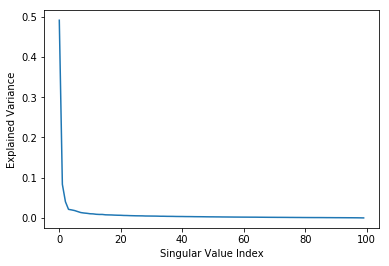

In [95]:
pca = PCA(n_components = None)
pca.fit(X)
plt.plot(range(len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_)
plt.xlabel('Singular Value Index')
plt.ylabel('Explained Variance')
plt.savefig('explained_variance.png', dpi=300)

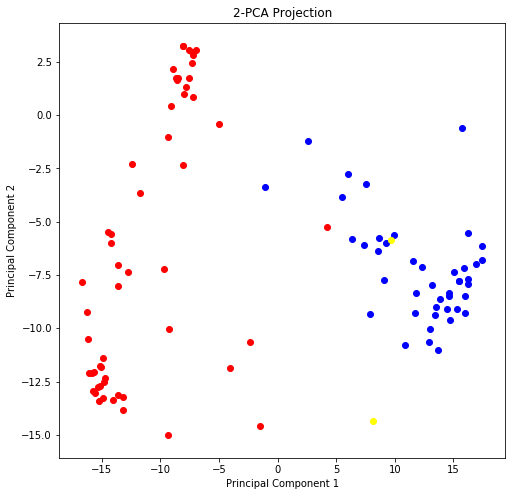

In [108]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_title('2-PCA Projection')
for senator in range(100):
    ax.scatter(X[senator,:] @ pca.components_[0,:], X[senator,:] @ pca.components_[1,:], c=affiliations[senator])
plt.savefig('pca_projection.png', dpi=300)

In [116]:
senator_df.loc[np.argmax(pca.components_[0,:])]

Unnamed: 0                                                                       15
bill_type bill_name bill_ID       Abortion Issues_Unintended Pregnancy Amendment...
 missing_votes                                                                    1
 Arlen Specter (PA)                                                              -1
 Barack H. Obama (IL)                                                             1
 BarbaraA Mikulski(MD)                                                            1
 BarbaraBoxer(CA)                                                                 1
 Bill Nelson(FL)                                                                  1
 BlancheL.Lincoln(AR)                                                             1
 ByronL.Dorgan(ND)                                                                1
 C.SaxbyChambliss(GA)                                                            -1
 CarlLevin(MI)                                                              

In [132]:
senator_scores = np.zeros(100)
for senator in range(100):
    senator_scores[senator] = np.abs(X[senator,:] @ pca.components_[0,:])
[(senator_df.columns[i+3], affiliations[i]) for i in np.argsort(senator_scores)[::-1]]

[(' PaulS.Sarbanes(MD)', 'Blue'),
 (" EdwardM.'Ted'Kennedy(MA)", 'Blue'),
 (' BarbaraBoxer(CA)', 'Blue'),
 (' JonKyl(AZ)', 'Red'),
 (' FrankR.Lautenberg(NJ)', 'Blue'),
 (' CarlLevin(MI)', 'Blue'),
 (" JamesM.'Jim'Inhofe(OK)", 'Red'),
 (" Thomas'Tom'Harkin(IA)", 'Blue'),
 (' CraigThomas(WY)', 'Red'),
 (" CharlesE.'Chuck' Grassley(IA)", 'Red'),
 (' ChristopherJ.Dodd(CT)', 'Blue'),
 (' BarbaraA Mikulski(MD)', 'Blue'),
 (' JohnForbesKerry(MA)', 'Blue'),
 (' LarryE.Craig(ID)', 'Red'),
 (' RussellD.Feingold (WI)', 'Blue'),
 (' MitchMcConnell(KY)', 'Red'),
 (' ConradR.Burns(MT)', 'Red'),
 (' OrrinG.Hatch(UT)', 'Red'),
 (' DanielKahikinaAkaka(HI)', 'Blue'),
 (' PatrickJ.Leahy(VT)', 'Blue'),
 (' TrentLott(MS)', 'Red'),
 (' PattyMurray(WA)', 'Blue'),
 (" WilliamH.'Bill'Frist(TN)", 'Red'),
 (' RobertF.Bennett(UT)', 'Red'),
 (" RichardJ.'Rick'Santorum(PA)", 'Red'),
 (' RichardC.Shelby(AL)', 'Red'),
 (" JohnF.'Jack'Reed(RI)", 'Blue'),
 (' ThadCochran(MS)', 'Red'),
 (' JuddA.Gregg(NH)', 'Red'),
 (' 